<a href="https://colab.research.google.com/github/akash1003/Image-Compression-Using-SVD/blob/main/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1: In this lab, you will explore the use of singular value decompition
(SVD), to approximate a matrix.

The matrix will be an image array - so you can visually see the 
results of the approximation.

Your work needs to be completed in the last two cells (code and text)

This assignment is largely based on the tutorial from here:
from https://numpy.org/numpy-tutorials/content/tutorial-svd.html

In [ ]:
import numpy as np
from scipy import misc
img = misc.face()

In [ ]:
type(img)

numpy.ndarray

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

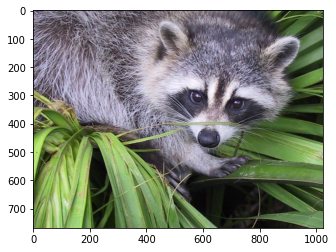

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img.shape #this is a 2D matrix with 3 channels (colors for red, green, blue)

(768, 1024, 3)

In [ ]:
#print the value of the 0th array (Red color)
img[:,:,0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [ ]:
#convert to numbers from 0 to 1
img_array = img / 255

In [ ]:
#check the min and max values to make sure they are within 0 to 1
img_array.max(), img_array.min(), img_array.dtype

(1.0, 0.0, dtype('float64'))

In [ ]:
red_array = img_array[:,:,0]
green_array = img_array[:,:,1]
blue_array = img_array[:,:,2]

Convert to grayscale by applying a filter on the three color
values. More info is here: https://en.wikipedia.org/wiki/Grayscale#Colorimetric_(perceptual_luminance-reserving)_conversion_to_grayscale

In [ ]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]

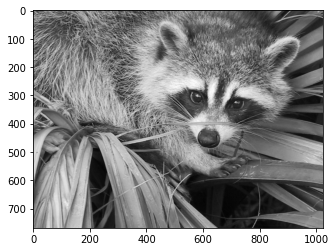

In [ ]:
plt.imshow(img_gray, cmap='gray')
plt.show()

The singular value decomposition of any matrix, factors a matrix as:

$A = U \Sigma V^T$

Here $A$ is $m x n$, $U$ is a orthogonal matrix of size $m x m$, $\Sigma$ is a diagonal matrix with $r$ non-zero singular values along the diagonal and is of size $m x n$ and $V$ is another orthogonal matrix of size $n x n$. The singular values are always positive and there are rank(A) of them. Ordering them in decreasing values - allows one to approximat the matrix A (as we will see in this lab below).

Singular values are like eigen values - but applicable to any rectangular matrix (recall that the eigen values are defined only for square matrices)

The SVD decomposition can help simplify certain downstream computations involving $A$. In addition, the singular values give a measure of how much change in the size $Ax$ is relative to $x$ (which we will explore in the next lab)


In [ ]:
# Use numpy's SVD function to obtain the factorizatin of matrix img_gray.

U,s,Vt = np.linalg.svd(img_gray)



In [ ]:
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [ ]:
#note that np returns singular values as  a linear array 's' (and not a diagonal matrix)
#we need to convert it into a diagonal
Sigma = np.zeros((U.shape[1],Vt.shape[0]))
np.fill_diagonal(Sigma,s)

In [ ]:
# 
img_gray_reconstructed = U @ Sigma @ Vt
np.linalg.norm(img_gray - img_gray_reconstructed)

1.4222975500799697e-12

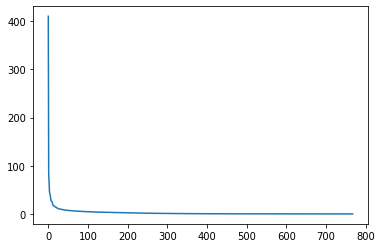

In [ ]:
#plot the singular values. There are 768 of them.
#numpy returns them in decreasing order of value.

plt.plot(s)
plt.show()

Note that the original matrix $A$ of size $m x n$ can be written as a sum of
'r' rank 1 matrices where $r <= min(m,n)$ and is the rank of $A$

$A = \sum_1^r{\sigma_i U_i  V_i^T}$

So we can approximate $A$ using the $k$ largest singular values as:

$A_{approx} = \sum_1^k{\sigma_i U_i  V_i^T}$

In [ ]:
# As an example, we will use the top 10 singular values 
# to approximate the image array
k=10
img_gray_approx = U @ Sigma[:,:k] @ Vt[:k, :]

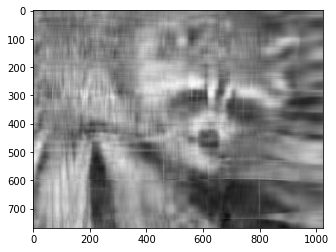

In [ ]:
plt.imshow(img_gray_approx,cmap='gray')
plt.show()

Find how close is the approximate matrix to original using a matrix norm.
There are various ways to define a matrix norm (i.e. distance between
matrices). 

This wiki page as a good summary
https://en.wikipedia.org/wiki/Matrix_norm

One approach is to think of the matrix as a  mxn vector and do the usual
euclidean norm. This called Frobenius norm.

Another approach is to look at the "induced norm", i.e. norm (or length) of the vectors in the range space - w.r.t to the vector norm used for calculating their respective lenghts.

All matrix norms are equivalent (i.e. the nearness relationship between the matrices is the same irrespective of what norm formula you use to calculate the nearness.)

Check from the numpy documentation what all norm formulae can the function linalg.norm support.

In [ ]:
np.linalg.norm(img_gray - img_gray_approx)

94.34580122549065

You can apply the SVD on the all three color channels
conveniently by changing the order of the matrix axes
- recall, that the img matrix has axis with dimensions m,n,c where m is 
768, n is 1024 and c is 3.

use numpy's transpose to change the order of the axes as c, m, n

Now all numpy function will work on submatrix corresponding to the axes from the end and will be applicable to all such sub-matrices (indexed by the axes in the beginning). This makes it
convenient to do SVD on all three color channels using a single statment.

In [ ]:
img_array_T = np.transpose(img_array, (2,0,1))
img_array_T.shape

(3, 768, 1024)

In [ ]:
# A single statement does SVD on the 768x1024 matrices of all three color channels
U,s,Vt = np.linalg.svd(img_array_T)

In [ ]:
# each of the SVD factors is now 3x 
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [ ]:
#recall that np returns singular values as a one-dimensional vector
#we need to fill it into a diagonal matrix
Sigma = np.zeros (U.shape)
for j in range(3):
  np.fill_diagonal(Sigma[j,:,:],s[j,:])

In [ ]:
#revisit the previus example to reconstruct using 10 singular values
k=20
approx_img = U @ Sigma[...,:k] @ Vt[...,:k, :]

In [ ]:
approx_img.shape

(3, 768, 1024)

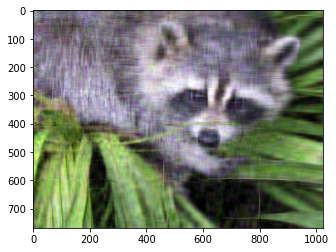

In [ ]:
plt.imshow(np.transpose(approx_img,(1,2,0)))
plt.show()

In [ ]:
# Q1. replace pass with your code
# find the error in the approximation matrix as a function of the of singular
# values. 
#
err = []
for k in range(100):
  #replace pass with your code
  approx = U @ Sigma[...,:k] @ Vt[...,:k, :]
  error = np.linalg.norm(img_array_T - approx)
  err.append(error)   #add to list of errors in err
print (err)

[748.5433379034885, 284.59604325528653, 249.64624370832166, 223.8043970719313, 209.83088322160955, 197.51807615141232, 186.6562702985482, 178.89406798685926, 172.33939262434575, 166.1666798890971, 160.55280095887275, 155.68571850902714, 151.49066593179055, 148.22237146725215, 145.17969588661526, 142.33700862385723, 139.71906203210676, 137.24540996285768, 134.92111032257256, 132.77679314069618, 130.68739646784474, 128.7462543065139, 126.97328721703957, 125.28928989882058, 123.6592508287169, 122.13263546526906, 120.65129042827422, 119.21824017898774, 117.84596716576222, 116.51663649611693, 115.24211000304648, 114.01751412022531, 112.8308418836742, 111.66737900527438, 110.52864904790161, 109.41748655655553, 108.33108862509037, 107.27227974795744, 106.23904245847896, 105.22336292012677, 104.24448054699307, 103.27687306350306, 102.34210223778577, 101.4211083375107, 100.51905532028823, 99.63541397891828, 98.76466306060424, 97.89668764701038, 97.03170989161389, 96.18116381333452, 95.347965992

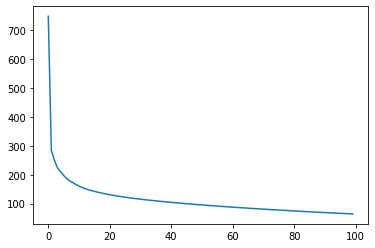

In [ ]:
plt.plot(err)
plt.show()

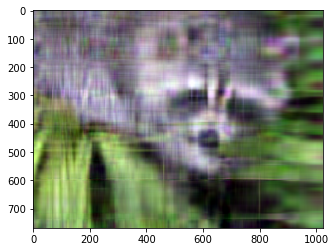

In [ ]:
# Q2. replace pass with your code
#From the above, determine a suitable 'k' which is the number of
#singular values and use that to reconstruct the image
#Check if it is visually ok
#Note that this is a subjective step.

k_choice = 9
approx_with_k_choice = U @ Sigma[...,:k_choice] @ Vt[...,:k_choice, :]
plt.imshow(np.transpose(approx_with_k_choice,(1,2,0)))
plt.show()

In [ ]:
# Q3. replace pass with your code
# We can use SVD for image compression.

num_original_image_parameters = img.shape[0]*img.shape[1]*img.shape[2]
print(num_original_image_parameters)

#Hint: You dont  want to directly send the reconstructed image
#it will have the same size as the original image
#however you want to send info in a way that the approx
# image can be reconstructed at the other end with k_choice

#num_approx_image_parameters = pass
U1,s1,Vt1 = np.linalg.svd(approx_with_k_choice)
U1.shape, s1.shape, Vt1.shape
num_approx_image_parameters = 3*(k_choice+(k_choice*768)+(k_choice*1024))
print(num_approx_image_parameters)

compression = num_approx_image_parameters/num_original_image_parameters
print("Compression = ",compression)

2359296
48411
Compression =  0.020519256591796875
